# Fake News Detection - EDA & Preprocessing
Simple and clear demonstration of Exploratory Data Analysis and Data Preprocessing

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

## 2. Load Dataset

In [2]:
# Load the datasets
fake_data = pd.read_csv('datasets/Fake.csv')
true_data = pd.read_csv('datasets/True.csv')

print("Datasets loaded successfully!")
print(f"Fake news: {fake_data.shape[0]} articles")
print(f"True news: {true_data.shape[0]} articles")

Datasets loaded successfully!
Fake news: 23481 articles
True news: 21417 articles


# Exploratory Data Analysis (EDA)

## 3. Basic Data Exploration

In [3]:
# View first few rows of fake news
print("=== Fake News Sample ===")
print(fake_data.head())

=== Fake News Sample ===
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [4]:
# View first few rows of true news
print("=== True News Sample ===")
print(true_data.head())

=== True News Sample ===
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [5]:
# Check data info
print("=== Fake News Info ===")
print(fake_data.info())
print("\n=== True News Info ===")
print(true_data.info())

=== Fake News Info ===
<class 'pandas.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   title    23481 non-null  str  
 1   text     23481 non-null  str  
 2   subject  23481 non-null  str  
 3   date     23481 non-null  str  
dtypes: str(4)
memory usage: 733.9 KB
None

=== True News Info ===
<class 'pandas.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   title    21417 non-null  str  
 1   text     21417 non-null  str  
 2   subject  21417 non-null  str  
 3   date     21417 non-null  str  
dtypes: str(4)
memory usage: 669.4 KB
None


In [6]:
# Check for missing values
print("=== Missing Values ===")
print("Fake News:", fake_data.isnull().sum().sum())
print("True News:", true_data.isnull().sum().sum())

=== Missing Values ===
Fake News: 0
True News: 0


## 4. Data Visualization

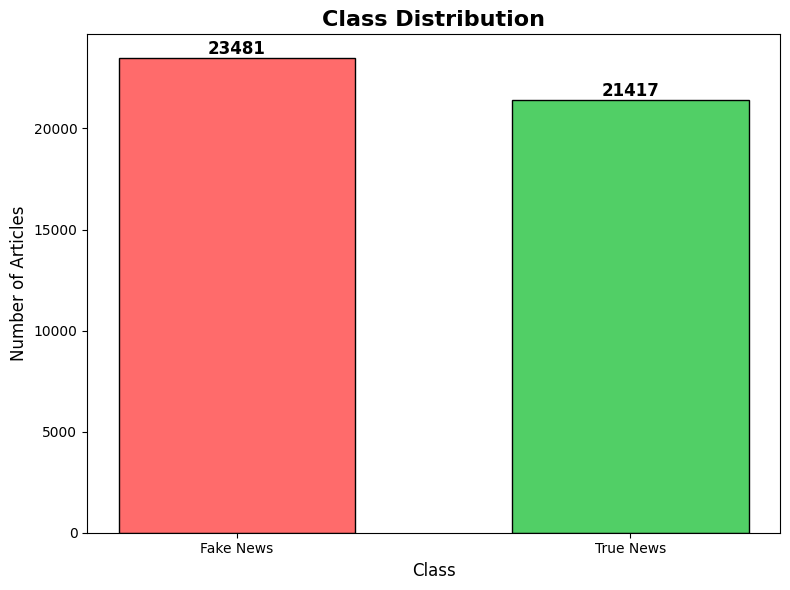

In [7]:
# Add class labels
fake_data['class'] = 0
true_data['class'] = 1

# Visualize class distribution
plt.figure(figsize=(8, 6))
class_counts = [fake_data.shape[0], true_data.shape[0]]
labels = ['Fake News', 'True News']
colors = ['#ff6b6b', '#51cf66']

plt.bar(labels, class_counts, color=colors, edgecolor='black', width=0.6)
plt.title('Class Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Number of Articles', fontsize=12)
plt.xlabel('Class', fontsize=12)

for i, v in enumerate(class_counts):
    plt.text(i, v + 200, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

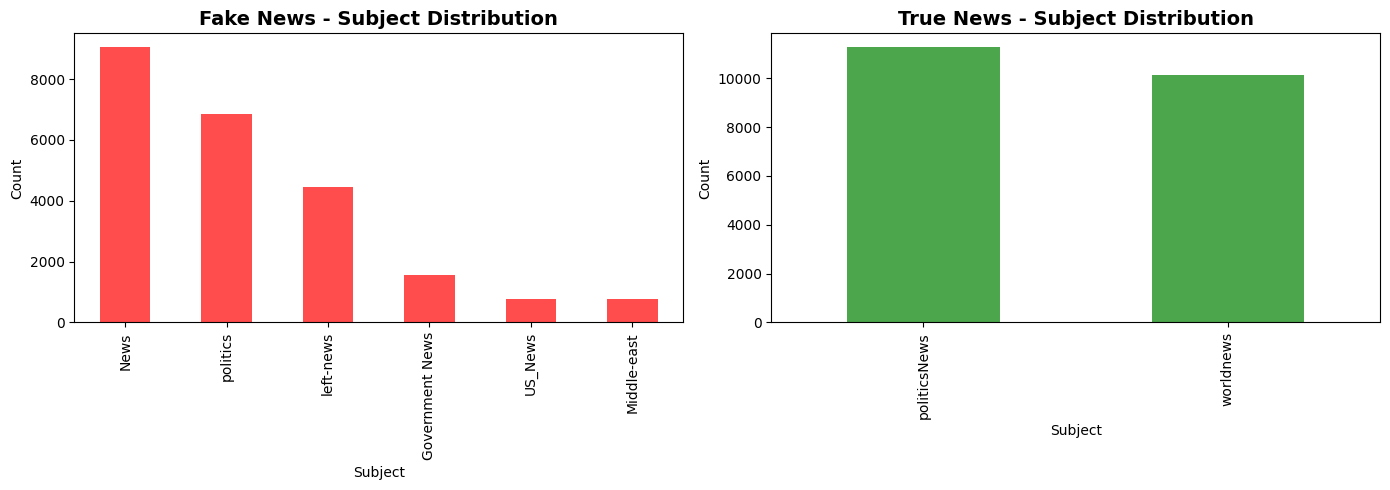

In [8]:
# Subject distribution comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

fake_data['subject'].value_counts().plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Fake News - Subject Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Subject')

true_data['subject'].value_counts().plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('True News - Subject Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Subject')

plt.tight_layout()
plt.show()

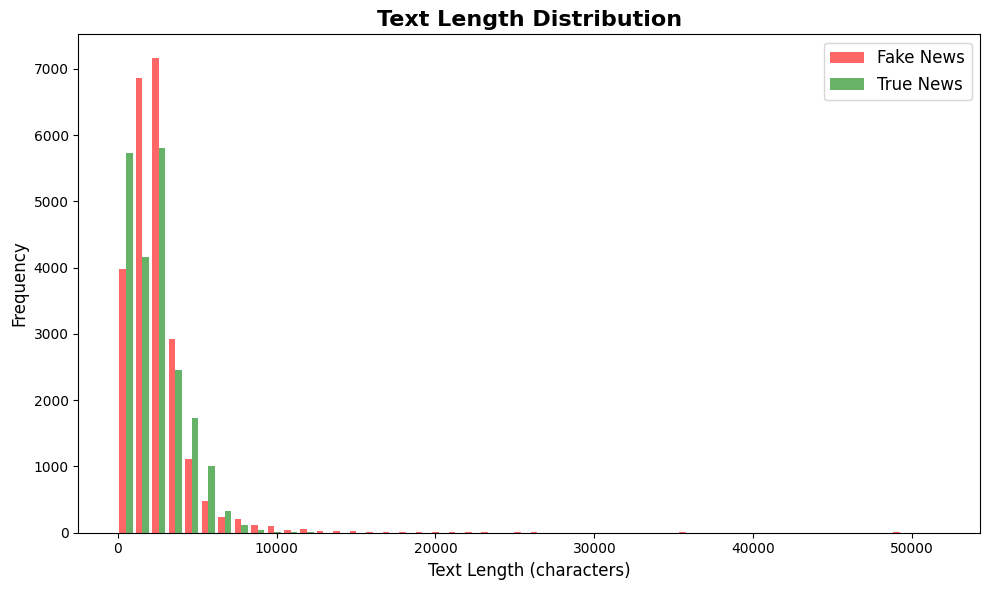

Average text length - Fake: 2547 chars
Average text length - True: 2383 chars


In [9]:
# Text length analysis
fake_data['text_length'] = fake_data['text'].str.len()
true_data['text_length'] = true_data['text'].str.len()

plt.figure(figsize=(10, 6))
plt.hist([fake_data['text_length'], true_data['text_length']], 
         bins=50, label=['Fake News', 'True News'], 
         color=['red', 'green'], alpha=0.6)
plt.title('Text Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Text Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print(f"Average text length - Fake: {fake_data['text_length'].mean():.0f} chars")
print(f"Average text length - True: {true_data['text_length'].mean():.0f} chars")

# Data Preprocessing

## 5. Merge Datasets

In [10]:
# Combine both datasets
data = pd.concat([fake_data, true_data], axis=0)
print(f"Total articles after merging: {data.shape[0]}")
print(f"Columns: {list(data.columns)}")

Total articles after merging: 44898
Columns: ['title', 'text', 'subject', 'date', 'class', 'text_length']


## 6. Remove Unnecessary Columns

In [11]:
# Drop columns not needed for classification
data = data.drop(['title', 'subject', 'date', 'text_length'], axis=1)
print("Remaining columns:", list(data.columns))
print(data.head())

Remaining columns: ['text', 'class']
                                                text  class
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0


## 7. Shuffle Data

In [12]:
# Shuffle the dataset randomly
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
print("Data shuffled and index reset")
print(data.head())

Data shuffled and index reset
                                                text  class
0  21st Century Wire says Ben Stein, reputable pr...      0
1  WASHINGTON (Reuters) - U.S. President Donald T...      1
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...      1
3  On Monday, Donald Trump once again embarrassed...      0
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...      1


## 8. Text Cleaning Function

In [13]:
# Define text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    return text

# Test the function
sample_text = "BREAKING NEWS!!! Check this out: https://example.com <tag> Text123"
print("Original:", sample_text)
print("Cleaned:", clean_text(sample_text))

Original: BREAKING NEWS!!! Check this out: https://example.com <tag> Text123
Cleaned: breaking news check this out   


## 9. Apply Text Cleaning

In [14]:
# Apply cleaning to all text data
print("Cleaning text data...")
data['text'] = data['text'].apply(clean_text)
print("Text cleaning completed!")
print("\nSample cleaned text:")
print(data['text'].iloc[0][:200])  # Show first 200 characters

Cleaning text data...
Text cleaning completed!

Sample cleaned text:
 century wire says ben stein reputable professor from pepperdine university also of some hollywood fame appearing in tv shows and films such as ferris bueller s day off made some provocative statement


## 10. Final Dataset Summary

In [15]:
# Display final dataset info
print("=== Final Preprocessed Dataset ===")
print(f"Shape: {data.shape}")
print(f"\nClass distribution:")
print(data['class'].value_counts())
print(f"\nMissing values: {data.isnull().sum().sum()}")
print("\nDataset is ready for model training!")

=== Final Preprocessed Dataset ===
Shape: (44898, 2)

Class distribution:
class
0    23481
1    21417
Name: count, dtype: int64

Missing values: 0

Dataset is ready for model training!


## Summary

### EDA Insights:
- ✓ Dataset contains balanced classes (Fake and True news)
- ✓ Multiple subjects covered in both categories
- ✓ Text length varies between fake and true news
- ✓ No missing values in the dataset

### Preprocessing Steps Completed:
1. ✓ Loaded and explored both datasets
2. ✓ Merged fake and true news data
3. ✓ Removed unnecessary columns
4. ✓ Shuffled data for randomization
5. ✓ Cleaned text (removed URLs, punctuation, numbers, etc.)
6. ✓ Dataset ready for model training